# Machine Learning Model for Subway Dataset in 2019

### Imports:

In [2]:
import pandas as pd

### Loading in Weather Data:


In [3]:
#note this is only up until unix time 1571436000, not the full year of 2019
weather_data=pd.read_json('weatherData.json')

In [4]:
weather_data.head(10)

,lat,lon,timezone,timezone_offset,data
0,40.7834,-73.9663,America/New_York,-18000,"[{'dt': 1546300800, 'sunrise': 1546258795, 'su..."
1,40.7834,-73.9663,America/New_York,-18000,"[{'dt': 1546304400, 'sunrise': 1546258795, 'su..."
2,40.7834,-73.9663,America/New_York,-18000,"[{'dt': 1546308000, 'sunrise': 1546258795, 'su..."
3,40.7834,-73.9663,America/New_York,-18000,"[{'dt': 1546311600, 'sunrise': 1546258795, 'su..."
4,40.7834,-73.9663,America/New_York,-18000,"[{'dt': 1546315200, 'sunrise': 1546258795, 'su..."
5,40.7834,-73.9663,America/New_York,-18000,"[{'dt': 1546318800, 'sunrise': 1546345203, 'su..."
6,40.7834,-73.9663,America/New_York,-18000,"[{'dt': 1546322400, 'sunrise': 1546345203, 'su..."
7,40.7834,-73.9663,America/New_York,-18000,"[{'dt': 1546326000, 'sunrise': 1546345203, 'su..."
8,40.7834,-73.9663,America/New_York,-18000,"[{'dt': 1546329600, 'sunrise': 1546345203, 'su..."
9,40.7834,-73.9663,America/New_York,-18000,"[{'dt': 1546333200, 'sunrise': 1546345203, 'su..."


- Lat: 40.7834	Lon: -73.9663

### Extract what we need from the weather data:

In [5]:
# Create an empty DataFrame to store the venue data
df_weather = pd.DataFrame(columns=['Time Stamp','Temperature (C)', 'Weather Main', 'Weather Description', 'Rain 1h', 'Snow 1h'])

#select the first venue
for k in range(len(weather_data)):
    data=weather_data.loc[k]
    time_stamp=data['data'][0]['dt']
    temp=data['data'][0]['feels_like']-273.15#store in celsius
    weather_main=data['data'][0]['weather'][0]['main']
    weather_description=data['data'][0]['weather'][0]['description']
    try:
        rain_1h=data['data'][0]['rain']['1h']
    except KeyError:
        rain_1h='NA'
    
    try:
        snow_1h=data['data'][0]['snow']['1h']
    except KeyError:
        snow_1h='NA'

    #append the values information to the DataFrame
    df_weather.loc[k] = [time_stamp,temp,weather_main,weather_description,rain_1h,snow_1h]


df_weather.head(20)


,Time Stamp,Temperature (C),Weather Main,Weather Description,Rain 1h,Snow 1h
0,1546300800,3.86,Rain,moderate rain,3.06,NA
1,1546304400,2.81,Rain,heavy intensity rain,4.31,NA
2,1546308000,3.41,Rain,heavy intensity rain,4.38,NA
3,1546311600,3.60,Rain,heavy intensity rain,5.84,NA
4,1546315200,5.45,Rain,moderate rain,3.77,NA
5,1546318800,5.29,Rain,heavy intensity rain,3.53,NA
6,1546322400,6.00,Rain,moderate rain,1.07,NA
7,1546326000,6.82,Mist,mist,0.47,NA
8,1546329600,10.08,Mist,mist,NA,NA
9,1546333200,10.38,Mist,mist,0.25,NA


- Now should I round the weather to every 4 hours to match the subway data, or divide the subway data into four 1 hour chunks?

### Loading in Subway Data:


In [6]:
turnstile_data=pd.read_csv('cleaned_turnstile_data.csv')
    

In [7]:
turnstile_data.head()

,turnstile_id,remote_unit_id,time_stamp,station_name,entries,exits
0,R138 R293 00-03-03,R293,1546290000,34 ST-PENN STA,0,0
1,R138 R293 00-02-05,R293,1546290000,34 ST-PENN STA,0,0
2,R138 R293 00-02-03,R293,1546290000,34 ST-PENN STA,0,0
3,R138 R293 00-00-02,R293,1546290000,34 ST-PENN STA,0,0
4,R138 R293 00-03-01,R293,1546290000,34 ST-PENN STA,0,0


### Creating busyness percentage for each station
- For each remote unit id and time condense to one row relating to busyness of that station at that time
- The busyness of a place is how many people are currently there, so exits-entries along with the magnitude in the sum of both values, can do both
- Sum of entries and exits for each remote unit id at that time
- Exits - entries for each remote unit id at that time
- Normalize each of these values

In [23]:
grouped_turnstile_data=turnstile_data.groupby(['remote_unit_id', 'time_stamp']).agg({'entries': 'max', 'exits': 'max'}).reset_index()

grouped_turnstile_data.head()

,remote_unit_id,time_stamp,entries,exits
0,R001,1546300800,0,0
1,R001,1546315200,102,104
2,R001,1546329600,96,51
3,R001,1546344000,260,476
4,R001,1546358400,540,496


In [24]:
len(grouped_turnstile_data)

297994

In [25]:
#add two new columns, one for difference between exits and entries as a proxy for surplus people in that area
#the other for the addition of exits and entries as a proxy for busyness in that area by volume
grouped_turnstile_data['num_people_exited']=grouped_turnstile_data['exits']-grouped_turnstile_data['entries']
#remove negative values and set to zero
#grouped_turnstile_data['num_people_exited']=grouped_turnstile_data['num_people_exited'].apply(lambda x: 0 if x<0 else x)

grouped_turnstile_data['sum_exit_entry']=grouped_turnstile_data['exits']+grouped_turnstile_data['entries']

grouped_turnstile_data.head(10)


,remote_unit_id,time_stamp,entries,exits,num_people_exited,sum_exit_entry
0,R001,1546300800,0,0,0,0
1,R001,1546315200,102,104,2,206
2,R001,1546329600,96,51,-45,147
3,R001,1546344000,260,476,216,736
4,R001,1546358400,540,496,-44,1036
5,R001,1546372800,602,250,-352,852
6,R001,1546387200,159,147,-12,306
7,R001,1546401600,48,38,-10,86
8,R001,1546416000,516,434,-82,950
9,R001,1546430400,842,1351,509,2193


In [26]:
#add a week number column to group further
#how many seconds in a week?
week=604800
start=1546300800
for i in range(0,52):
    current_time=start+week*i
    #for all the timestamps in the week set week number column to i
    for j in range(len(grouped_turnstile_data)):
        if grouped_turnstile_data.loc[j,'time_stamp']>=current_time and grouped_turnstile_data.loc[j,'time_stamp']<current_time+week:
            grouped_turnstile_data.loc[j,'week_num']=i


grouped_turnstile_data.head(10)

In [17]:
grouped_turnstile_data.tail()

,remote_unit_id,time_stamp,entries,exits,num_people_exited,sum_exit_entry,week_number
297989,R572,1970-01-01 00:00:01.577419200,29,80,51,109,1
297990,R572,1970-01-01 00:00:01.577433600,237,212,-25,449,1
297991,R572,1970-01-01 00:00:01.577448000,631,438,-193,1069,1
297992,R572,1970-01-01 00:00:01.577462400,551,500,-51,1051,1
297993,R572,1970-01-01 00:00:01.577476800,586,612,26,1198,1


### Use of z-score
- A z-score quantifies the distance between a data point and the mean of a distribution in terms of standard deviations. It indicates how many standard deviations an observation is above or below the mean of a distribution. 

In [11]:
#get a standardized z score for each staiton
from sklearn.preprocessing import StandardScaler

#function to be applied to each group
def standardize_group(group):
    scaler = StandardScaler()
    group[['z_score_num_people_exited', 'z_score_sum_exit_entry']] = scaler.fit_transform(group[['num_people_exited', 'sum_exit_entry']])
    return group

#apply the function to each group
grouped_turnstile_data = grouped_turnstile_data.groupby('remote_unit_id', group_keys=True).apply(standardize_group)

grouped_turnstile_data.head(20)


remote_unit_id  time_stamp  entries  exits  \
remote_unit_id                                                 
R001           0            R001  1546300800        0      0   
               1            R001  1546315200      102    104   
               2            R001  1546329600       96     51   
               3            R001  1546344000      260    476   
               4            R001  1546358400      540    496   
               5            R001  1546372800      602    250   
               6            R001  1546387200      159    147   
               7            R001  1546401600       48     38   
               8            R001  1546416000      516    434   
               9            R001  1546430400      842   1351   
               10           R001  1546444800      784    456   
               11           R001  1546459200     1445    686   
               12           R001  1546473600      284    225   
               13           R001  1546488000       68     68   
               14           R001  1546502400      486    418   
               15           R001  1546516800      887   1370   
               16           R001  1546531200      776    482   
               17           R001  1546545600     1526    754   
               18           R001  1546560000      292    243   
               19           R001  1546574400       85     72   

                   num_people_exited  sum_exit_entry  \
remote_unit_id                                         
R001           0                   0               0   
               1                   2             206   
               2                 -45             147   
               3                 216             736   
               4                 -44            1036   
               5                -352             852   
               6                 -12             306   
               7                 -10              86   
               8                 -82             950   
               9                 509            2193   
               10               -328            1240   
               11               -759            2131   
               12                -59             509   
               13                  0             136   
               14                -68             904   
               15                483            2257   
               16               -294            1258   
               17               -772            2280   
               18                -49             535   
               19                -13             157   

                   z_score_num_people_exited  z_score_sum_exit_entry  
remote_unit_id                                                        
R001           0                    0.031249               -0.917244  
               1                    0.039109               -0.687580  
               2                   -0.145608               -0.753358  
               3                    0.880160               -0.096695  
               4                   -0.141677                0.237767  
               5                   -1.352161                0.032630  
               6                   -0.015913               -0.576092  
               7                   -0.008053               -0.821365  
               8                   -0.291023                0.141888  
               9                    2.031692                1.527679  
               10                  -1.257838                0.465202  
               11                  -2.951729                1.458557  
               12                  -0.200630               -0.349772  
               13                   0.031249               -0.765621  
               14                  -0.236001                0.090604  
               15                   1.929508                1.599031  
               16                  -1.124213                0.485270  
               17          

In [12]:
#convert the z-score to a percentile, we want % busyness after all
from scipy.stats import norm

grouped_turnstile_data['percentile_num_people_exited'] = norm.cdf(grouped_turnstile_data['z_score_num_people_exited'])

grouped_turnstile_data['percentile_sum_exit_entry'] = norm.cdf(grouped_turnstile_data['z_score_sum_exit_entry'])

grouped_turnstile_data.head(10)

remote_unit_id  time_stamp  entries  exits  \
remote_unit_id                                                
R001           0           R001  1546300800        0      0   
               1           R001  1546315200      102    104   
               2           R001  1546329600       96     51   
               3           R001  1546344000      260    476   
               4           R001  1546358400      540    496   
               5           R001  1546372800      602    250   
               6           R001  1546387200      159    147   
               7           R001  1546401600       48     38   
               8           R001  1546416000      516    434   
               9           R001  1546430400      842   1351   

                  num_people_exited  sum_exit_entry  \
remote_unit_id                                        
R001           0                  0               0   
               1                  2             206   
               2                -45             147   
               3                216             736   
               4                -44            1036   
               5               -352             852   
               6                -12             306   
               7                -10              86   
               8                -82             950   
               9                509            2193   

                  z_score_num_people_exited  z_score_sum_exit_entry  \
remote_unit_id                                                        
R001           0                   0.031249               -0.917244   
               1                   0.039109               -0.687580   
               2                  -0.145608               -0.753358   
               3                   0.880160               -0.096695   
               4                  -0.141677                0.237767   
               5                  -1.352161                0.032630   
               6                  -0.015913               -0.576092   
               7                  -0.008053               -0.821365   
               8                  -0.291023                0.141888   
               9                   2.031692                1.527679   

                  percentile_num_people_exited  percentile_sum_exit_entry  
remote_unit_id                                                             
R001           0                      0.512464                   0.179507  
               1                      0.515598                   0.245859  
               2                      0.442116                   0.225618  
               3                      0.810614                   0.461484  
               4                      0.443667                   0.593969  
               5                      0.088162                   0.513015  
               6                      0.493652                   0.282276  
               7                      0.496788                   0.205719  
               8                      0.385517                   0.556416  
               9                      0.978908                   0.936704

In [13]:
df_busyness=grouped_turnstile_data[['remote_unit_id', 'time_stamp', 'entries', 'exits','percentile_num_people_exited','percentile_sum_exit_entry']].copy()
df_busyness.tail(10)

remote_unit_id  time_stamp  entries  exits  \
remote_unit_id                                                     
R572           297984           R572  1577347200      214    200   
               297985           R572  1577361600      523    393   
               297986           R572  1577376000      476    400   
               297987           R572  1577390400      540    635   
               297988           R572  1577404800      119    379   
               297989           R572  1577419200       29     80   
               297990           R572  1577433600      237    212   
               297991           R572  1577448000      631    438   
               297992           R572  1577462400      551    500   
               297993           R572  1577476800      586    612   

                       percentile_num_people_exited  percentile_sum_exit_entry  
remote_unit_id                                                                  
R572           297984                      0.543978                   0.273188  
               297985                      0.346874                   0.514420  
               297986                      0.436817                   0.494099  
               297987                      0.720480                   0.642825  
               297988                      0.903456                   0.309871  
               297989                      0.652843                   0.160684  
               297990                      0.524975                   0.288209  
               297991                      0.252186                   0.591349  
               297992                      0.479913                   0.582421  
               297993                      0.611923                   0.653694

### Explain the new columns:
- Percentile_num_people_exited is a normalized percentage for each station (remote unit id). A value of ~0.5 indicates the same number of entries and exits. A value lower than ~0.5 indicates more entries than exits. A value higher than ~0.5 indicates more exits than entries.
- I see this as a useful metric as the more exits there are than entries the busier the surrounding area is likely to be.
- This column can be used for a more general busyness prediction of areas around stations.
- Percentile_sum_exit_entry is a normalized percentage for each station (remote unit id). The higher the value the greater the total entries and exits in that time period.
- I see this as a useful metric as it is a proxy for the footfall in a station at a certain time.
- This column can be used for a more specific busyness prediciton of each station.



#### Tidy up the columns and names

In [14]:
#change the new columns to percentages and 4 digits
df_busyness['percentile_num_people_exited']=df_busyness['percentile_num_people_exited'].apply(lambda x: round(x*100,2))
df_busyness['percentile_sum_exit_entry']=df_busyness['percentile_sum_exit_entry'].apply(lambda x: round(x*100,2))
#change the names of the new columns
df_busyness.rename(columns={'percentile_num_people_exited':'surrounding_area_busyness', 'percentile_sum_exit_entry':'station_busyness'}, inplace=True)
df_busyness.head(10)

remote_unit_id  time_stamp  entries  exits  \
remote_unit_id                                                
R001           0           R001  1546300800        0      0   
               1           R001  1546315200      102    104   
               2           R001  1546329600       96     51   
               3           R001  1546344000      260    476   
               4           R001  1546358400      540    496   
               5           R001  1546372800      602    250   
               6           R001  1546387200      159    147   
               7           R001  1546401600       48     38   
               8           R001  1546416000      516    434   
               9           R001  1546430400      842   1351   

                  surrounding_area_busyness  station_busyness  
remote_unit_id                                                 
R001           0                      51.25             17.95  
               1                      51.56             24.59  
               2                      44.21             22.56  
               3                      81.06             46.15  
               4                      44.37             59.40  
               5                       8.82             51.30  
               6                      49.37             28.23  
               7                      49.68             20.57  
               8                      38.55             55.64  
               9                      97.89             93.67

In [15]:
df_busyness.tail(20)

remote_unit_id  time_stamp  entries  exits  \
remote_unit_id                                                     
R572           297974           R572  1577203200      570    460   
               297975           R572  1577217600      407    532   
               297976           R572  1577232000      144    260   
               297977           R572  1577246400       25    101   
               297978           R572  1577260800       64     70   
               297979           R572  1577275200      224    157   
               297980           R572  1577289600      315    228   
               297981           R572  1577304000      253    321   
               297982           R572  1577318400      115    243   
               297983           R572  1577332800       23     70   
               297984           R572  1577347200      214    200   
               297985           R572  1577361600      523    393   
               297986           R572  1577376000      476    400   
               297987           R572  1577390400      540    635   
               297988           R572  1577404800      119    379   
               297989           R572  1577419200       29     80   
               297990           R572  1577433600      237    212   
               297991           R572  1577448000      631    438   
               297992           R572  1577462400      551    500   
               297993           R572  1577476800      586    612   

                       surrounding_area_busyness  station_busyness  
remote_unit_id                                                      
R572           297974                      37.95             57.20  
               297975                      76.26             52.61  
               297976                      75.03             26.90  
               297977                      69.21             16.60  
               297978                      57.82             16.86  
               297979                      45.23             25.94  
               297980                      41.81             33.04  
               297981                      67.97             34.48  
               297982                      76.66             25.00  
               297983                      64.64             15.58  
               297984                      54.40             27.32  
               297985                      34.69             51.44  
               297986                      43.68             49.41  
               297987                      72.05             64.28  
               297988                      90.35             30.99  
               297989                      65.28             16.07  
               297990                      52.50             28.82  
               297991                      25.22             59.13  
               297992                      47.99             58.24  
               297993                      61.19             65.37

### For training the model:
- Include the day, time of day and weather for each row

In [16]:
#add hour of the day column
df_busyness['hour']=pd.to_datetime(df_busyness['time_stamp'], unit='s').dt.hour
#add day column
df_busyness['day']=pd.to_datetime(df_busyness['time_stamp'], unit='s').dt.day_name()
#add day of the month and month, eg 1 January
df_busyness['month']=pd.to_datetime(df_busyness['time_stamp'], unit='s').dt.month_name()

df_busyness.head(10)


remote_unit_id  time_stamp  entries  exits  \
remote_unit_id                                                
R001           0           R001  1546300800        0      0   
               1           R001  1546315200      102    104   
               2           R001  1546329600       96     51   
               3           R001  1546344000      260    476   
               4           R001  1546358400      540    496   
               5           R001  1546372800      602    250   
               6           R001  1546387200      159    147   
               7           R001  1546401600       48     38   
               8           R001  1546416000      516    434   
               9           R001  1546430400      842   1351   

                  surrounding_area_busyness  station_busyness  hour  \
remote_unit_id                                                        
R001           0                      51.25             17.95     0   
               1                      51.56             24.59     4   
               2                      44.21             22.56     8   
               3                      81.06             46.15    12   
               4                      44.37             59.40    16   
               5                       8.82             51.30    20   
               6                      49.37             28.23     0   
               7                      49.68             20.57     4   
               8                      38.55             55.64     8   
               9                      97.89             93.67    12   

                        day    month  
remote_unit_id                        
R001           0    Tuesday  January  
               1    Tuesday  January  
               2    Tuesday  January  
               3    Tuesday  January  
               4    Tuesday  January  
               5    Tuesday  January  
               6  Wednesday  January  
               7  Wednesday  January  
               8  Wednesday  January  
               9  Wednesday  January

In [17]:
df_busyness.tail(10)

remote_unit_id  time_stamp  entries  exits  \
remote_unit_id                                                     
R572           297984           R572  1577347200      214    200   
               297985           R572  1577361600      523    393   
               297986           R572  1577376000      476    400   
               297987           R572  1577390400      540    635   
               297988           R572  1577404800      119    379   
               297989           R572  1577419200       29     80   
               297990           R572  1577433600      237    212   
               297991           R572  1577448000      631    438   
               297992           R572  1577462400      551    500   
               297993           R572  1577476800      586    612   

                       surrounding_area_busyness  station_busyness  hour  \
remote_unit_id                                                             
R572           297984                      54.40             27.32     8   
               297985                      34.69             51.44    12   
               297986                      43.68             49.41    16   
               297987                      72.05             64.28    20   
               297988                      90.35             30.99     0   
               297989                      65.28             16.07     4   
               297990                      52.50             28.82     8   
               297991                      25.22             59.13    12   
               297992                      47.99             58.24    16   
               297993                      61.19             65.37    20   

                            day     month  
remote_unit_id                             
R572           297984  Thursday  December  
               297985  Thursday  December  
               297986  Thursday  December  
               297987  Thursday  December  
               297988    Friday  December  
               297989    Friday  December  
               297990    Friday  December  
               297991    Friday  December  
               297992    Friday  December  
               297993    Friday  December

- Missing last 4 days of Subway data in 2019 for every station

### Map the weather to each station for each time interval

In [ ]:
#map the weather to the corresponding time for each station
# Chagne busyness relative to each station per week and round to nearest 5% as integer

### Plots for data visualization:
- Subway data- plot each station by largest total entries and exits for the year
- BestTime api- show busyness of statue of liberty for the week?
- Weather data- plot rainfall for the each month?

In [69]:
# Copy the data
subway_plot = turnstile_data.copy()

# Group by 'remote_unit_id' and calculate the total 'entries' and 'exits'

subway_plot = subway_plot.groupby('remote_unit_id')['entries', 'exits'].sum().reset_index()

# Calculate the total entries and exits and add a new column
subway_plot['total_entries_exits'] = subway_plot['entries'] + subway_plot['exits']

# Sort the DataFrame by 'total_entries_exits' in descending order
subway_plot = subway_plot.sort_values('total_entries_exits', ascending=False)

# Convert the DataFrame to a list
plot = subway_plot[['remote_unit_id', 'total_entries_exits']].values.tolist()

#look up the remote unit id in the cleaned_station_data.csv file
station_data=pd.read_csv('cleaned_station_data.csv')
#check how many unique station names there are
print(len(station_data['station_name'].unique()))
#check how many unique remote unit ids there are
print(len(station_data['remote_unit_id'].unique()))

for i in range(len(plot)):
    if plot[i][0] in station_data['remote_unit_id'].values:
        plot[i][0]=station_data[station_data['remote_unit_id']==plot[i][0]]['station_name'].values[0]

#sort in descending order
plot.sort(key=lambda x: x[1], reverse=True)

# Print the top 10 stations
#print(plot[0:10])


/tmp/ipykernel_24047/4026529364.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  subway_plot = subway_plot.groupby('remote_unit_id')['entries', 'exits'].sum().reset_index()


86
143


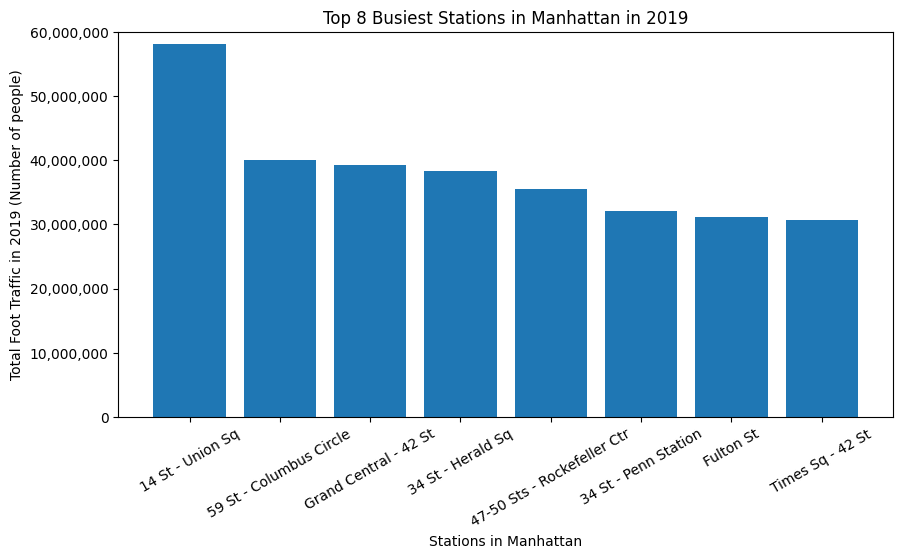

In [72]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

remote_id = [entry[0] for entry in plot[:8]]  # Get the top 10 stations
total_volume = [entry[1] for entry in plot[:8]]  # Get the total volume for each station

# Define the desired range for the y-axis
y_min = 0
y_max = 60000000

plt.bar(remote_id, total_volume)
plt.xlabel('Stations in Manhattan')
plt.ylabel('Total Foot Traffic in 2019 (Number of people)')
plt.title('Top 8 Busiest Stations in Manhattan in 2019')

# Format the y-axis labels with commas and set the range
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylim(y_min, y_max)

plt.xticks(rotation=30)
plt.show()


In [74]:
# add the total volume to get total foot traffic value
tot = sum(entry[1] for entry in plot)
tot

1642167565